In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [4]:
def read_file(filename):
    '''returns the file as a dataframe'''
    df = pd.read_csv(filename)
    return df

data = read_file('billboard-lyrics-spotify.csv')
data.head(5)

,artist_all,artist_base,rank,song,year,artist_featured,song_clean,artist_clean,lyrics,acousticness,...,speechiness,tempo,time_signature,valence,duration_min,num_words,words_per_sec,num_uniq_words,decade,uniq_ratio
0,percy faith,percy faith,1,theme from a summer place,1960,NaN,theme from a summer place,percy faith,theres a summer place where it may rain or sto...,0.631,...,0.0253,92.631,4.0,0.749,2.414883,104.0,0.717771,58.0,1960,1.793103
1,jim reeves,jim reeves,2,he'll have to go,1960,NaN,hell have to go,jim reeves,put your sweet lips a little closer to the pho...,0.909,...,0.0379,81.181,3.0,0.200,2.310667,152.0,1.096365,69.0,1960,2.202899
2,the everly brothers,the everly brothers,3,cathy's clown,1960,NaN,cathys clown,the everly brothers,dont want your love any more dont want your k...,0.412,...,0.0339,119.809,4.0,0.866,2.400217,121.0,0.840202,64.0,1960,1.890625
3,johnny preston,johnny preston,4,running bear,1960,NaN,running bear,johnny preston,on the bank of the river stood running bear yo...,0.854,...,0.0530,119.987,4.0,0.822,2.636667,220.0,1.390645,89.0,1960,2.471910
4,mark dinning,mark dinning,5,teen angel,1960,NaN,teen angel,mark dinning,teen angel teen angel teen angel that fateful ...,0.936,...,0.0459,101.517,4.0,0.282,2.664883,109.0,0.681706,73.0,1960,1.493151


Text(32.5, 1, 'Billboard Year-End\nHot 100 1960-2017')

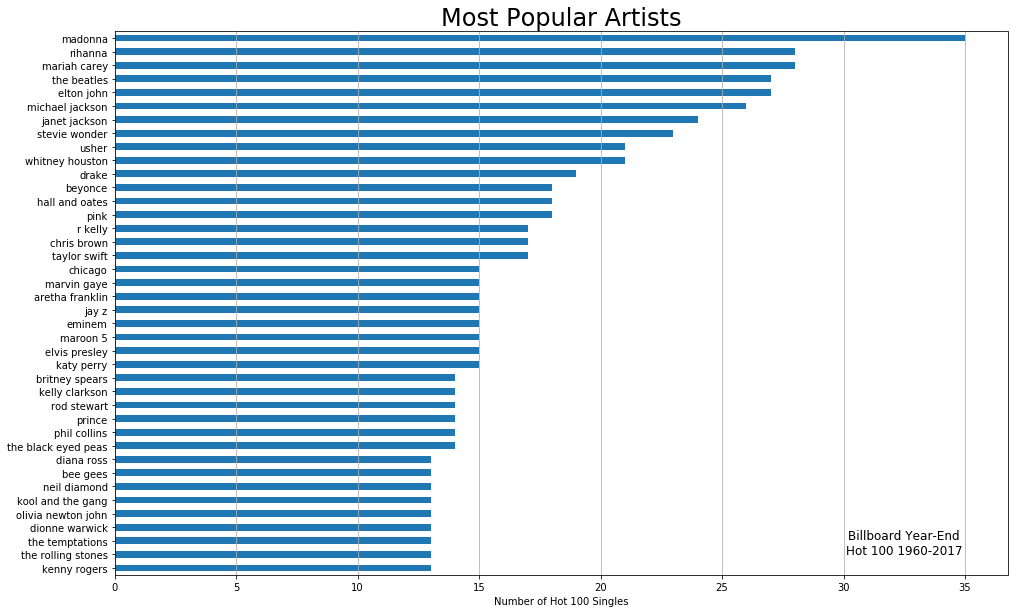

In [13]:
ax = data['artist_clean'].value_counts().sort_values().tail(40)\
                       .plot.barh(figsize=(16,10))
ax.xaxis.grid(True)
ax.set(xlabel='Number of Hot 100 Singles')
ax.set_title('Most Popular Artists', fontsize=24)
ax.annotate('Billboard Year-End\nHot 100 1960-2017', xy=(32.5,1),
            fontsize=12, ha='center')

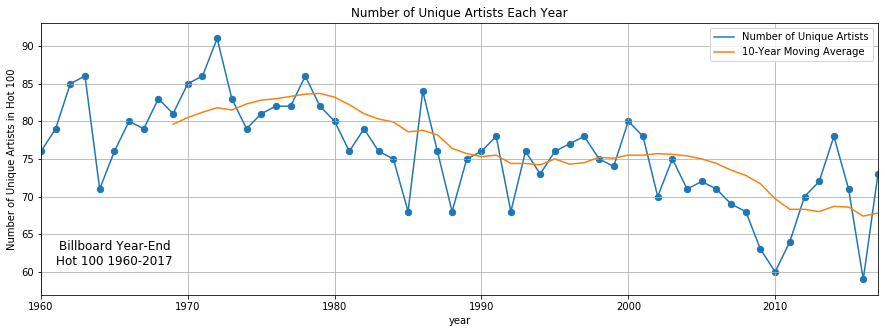

In [20]:
# calculate number of unique artists for each year
nunique_artists_year = data.groupby(['year'])['artist_clean'].agg(pd.Series.nunique)

# generate line plot and augment with points
ax = nunique_artists_year.plot.line(figsize = (15,5), grid=True, label='# unique artists')
ax.scatter(nunique_artists_year.index, nunique_artists_year, s=40)
ax.set(ylabel='Number of Unique Artists in Hot 100',
       title='Number of Unique Artists Each Year')

# denoise with a 10-year moving average
nunique_artists_year.rolling(window=10).mean().plot(
    grid=True, label='10-year moving average')
ax.annotate('Billboard Year-End\nHot 100 1960-2017', xy=(1965,61),
            fontsize=12, ha='center')
plt.legend(['Number of Unique Artists', '10-Year Moving Average']);

Text(1962, 1.5, 'Billboard Year-End\nHot 100 1960-2017')

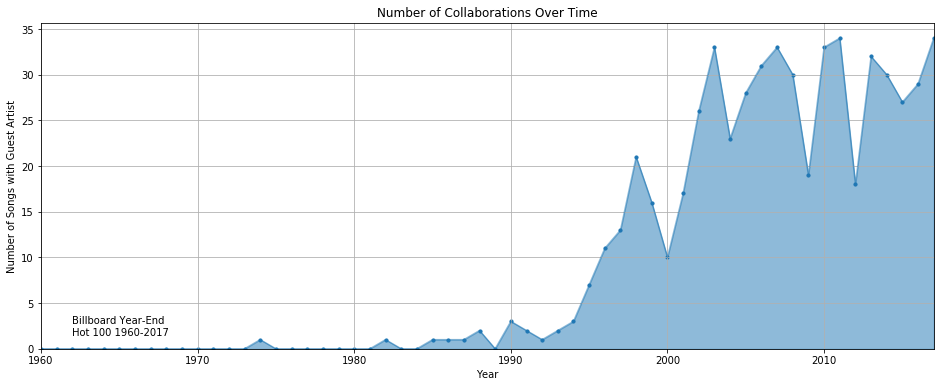

In [21]:
# collaboration counted if artist name contains "featuring"
df_collab = data[data['artist_all'].str.contains('featuring')]
df_collab = df_collab.groupby(['year'])['artist_clean']\
                     .count().reindex(range(1960, 2018))
df_collab = df_collab.fillna(0)

# generate line plot and augment with points
ax = df_collab.plot.area(figsize=(16,6), grid=True, alpha=0.5)
ax.scatter(df_collab.index, df_collab, s=10)
ax.set(ylabel='Number of Songs with Guest Artist',
       xlabel='Year',
       title='Number of Collaborations Over Time');
ax.annotate('Billboard Year-End\nHot 100 1960-2017',
            xy=(1962,1.5))
